How does having a reliable and close person in one's life affect daily physical and mental wellbeing.


In [ ]:
import pandas as pd

df = pd.read_csv("CSCS_data_anon.csv", low_memory=False)

df.shape
df.head(20)

/tmp/ipykernel_52/2088561923.py:7: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
/tmp/ipykernel_52/2088561923.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


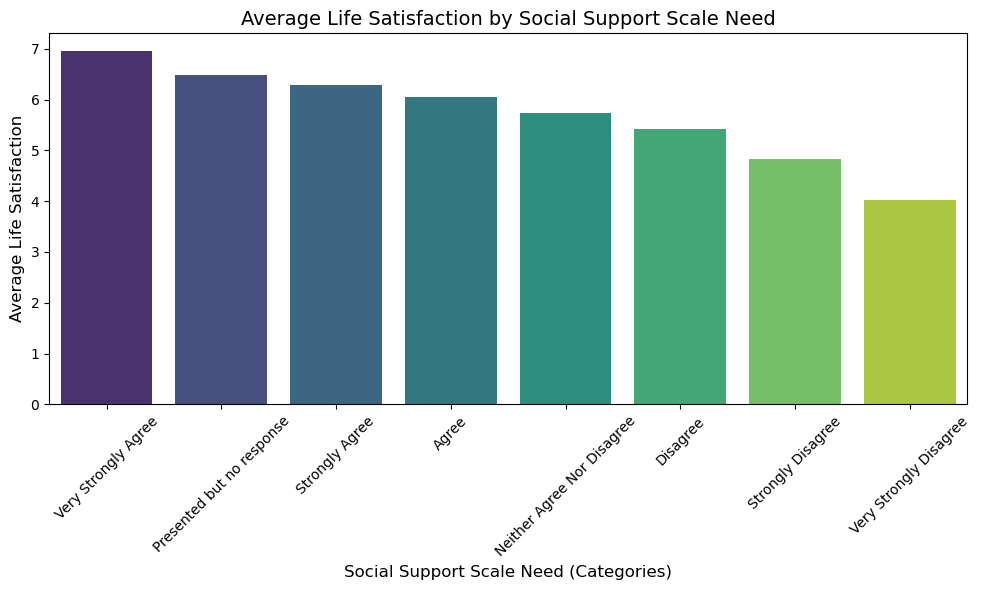

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "CSCS_data_anon.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Check if the relevant columns exist in the dataset
if 'PSYCH_zimet_multidimensional_social_support_scale_need' in data.columns and 'WELLNESS_life_satisfaction' in data.columns:
    # Group by the categorical variable and calculate the mean life satisfaction score
    avg_life_satisfaction = data.groupby('PSYCH_zimet_multidimensional_social_support_scale_need')['WELLNESS_life_satisfaction'].mean().reset_index()
    
    # Sort the categories for better visualization (optional)
    avg_life_satisfaction = avg_life_satisfaction.sort_values(by='WELLNESS_life_satisfaction', ascending=False)
    
    # Plotting the average life satisfaction for each category
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='PSYCH_zimet_multidimensional_social_support_scale_need',
        y='WELLNESS_life_satisfaction',
        data=avg_life_satisfaction,
        palette="viridis"
    )
    
    plt.title('Average Life Satisfaction by Social Support Scale Need', fontsize=14)
    plt.xlabel('Social Support Scale Need (Categories)', fontsize=12)
    plt.ylabel('Average Life Satisfaction', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()
else:
    print("The required columns are not in the dataset. Please check the column names.")


/tmp/ipykernel_52/975518586.py:7: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


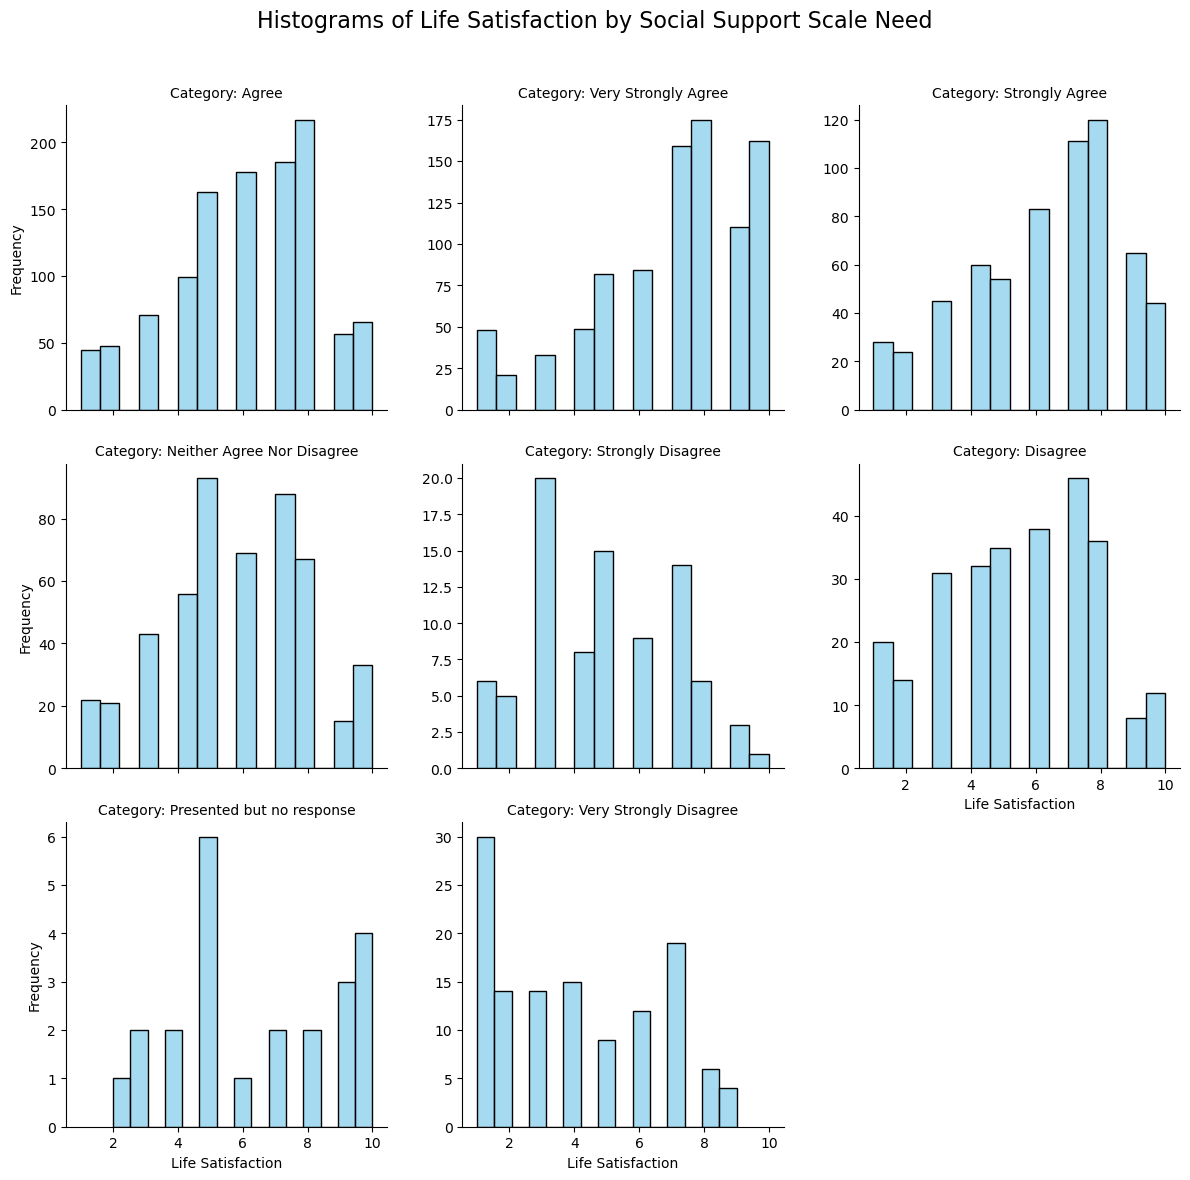

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "CSCS_data_anon.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Check if the relevant columns exist in the dataset
if 'PSYCH_zimet_multidimensional_social_support_scale_need' in data.columns and 'WELLNESS_life_satisfaction' in data.columns:
    # Facet histogram using seaborn
    g = sns.FacetGrid(
        data,
        col="PSYCH_zimet_multidimensional_social_support_scale_need",
        col_wrap=3,  # Adjust the number of columns per row as needed
        height=4,    # Height of each plot
        sharey=False  # Allow each subplot to have its own y-axis
    )
    g.map(sns.histplot, "WELLNESS_life_satisfaction", kde=False, color="skyblue", bins=15)
    
    # Add titles and labels
    g.set_titles("Category: {col_name}")
    g.set_axis_labels("Life Satisfaction", "Frequency")
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Histograms of Life Satisfaction by Social Support Scale Need', fontsize=16)
    plt.show()
else:
    print("The required columns are not in the dataset. Please check the column names.")


/tmp/ipykernel_52/1111242111.py:8: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


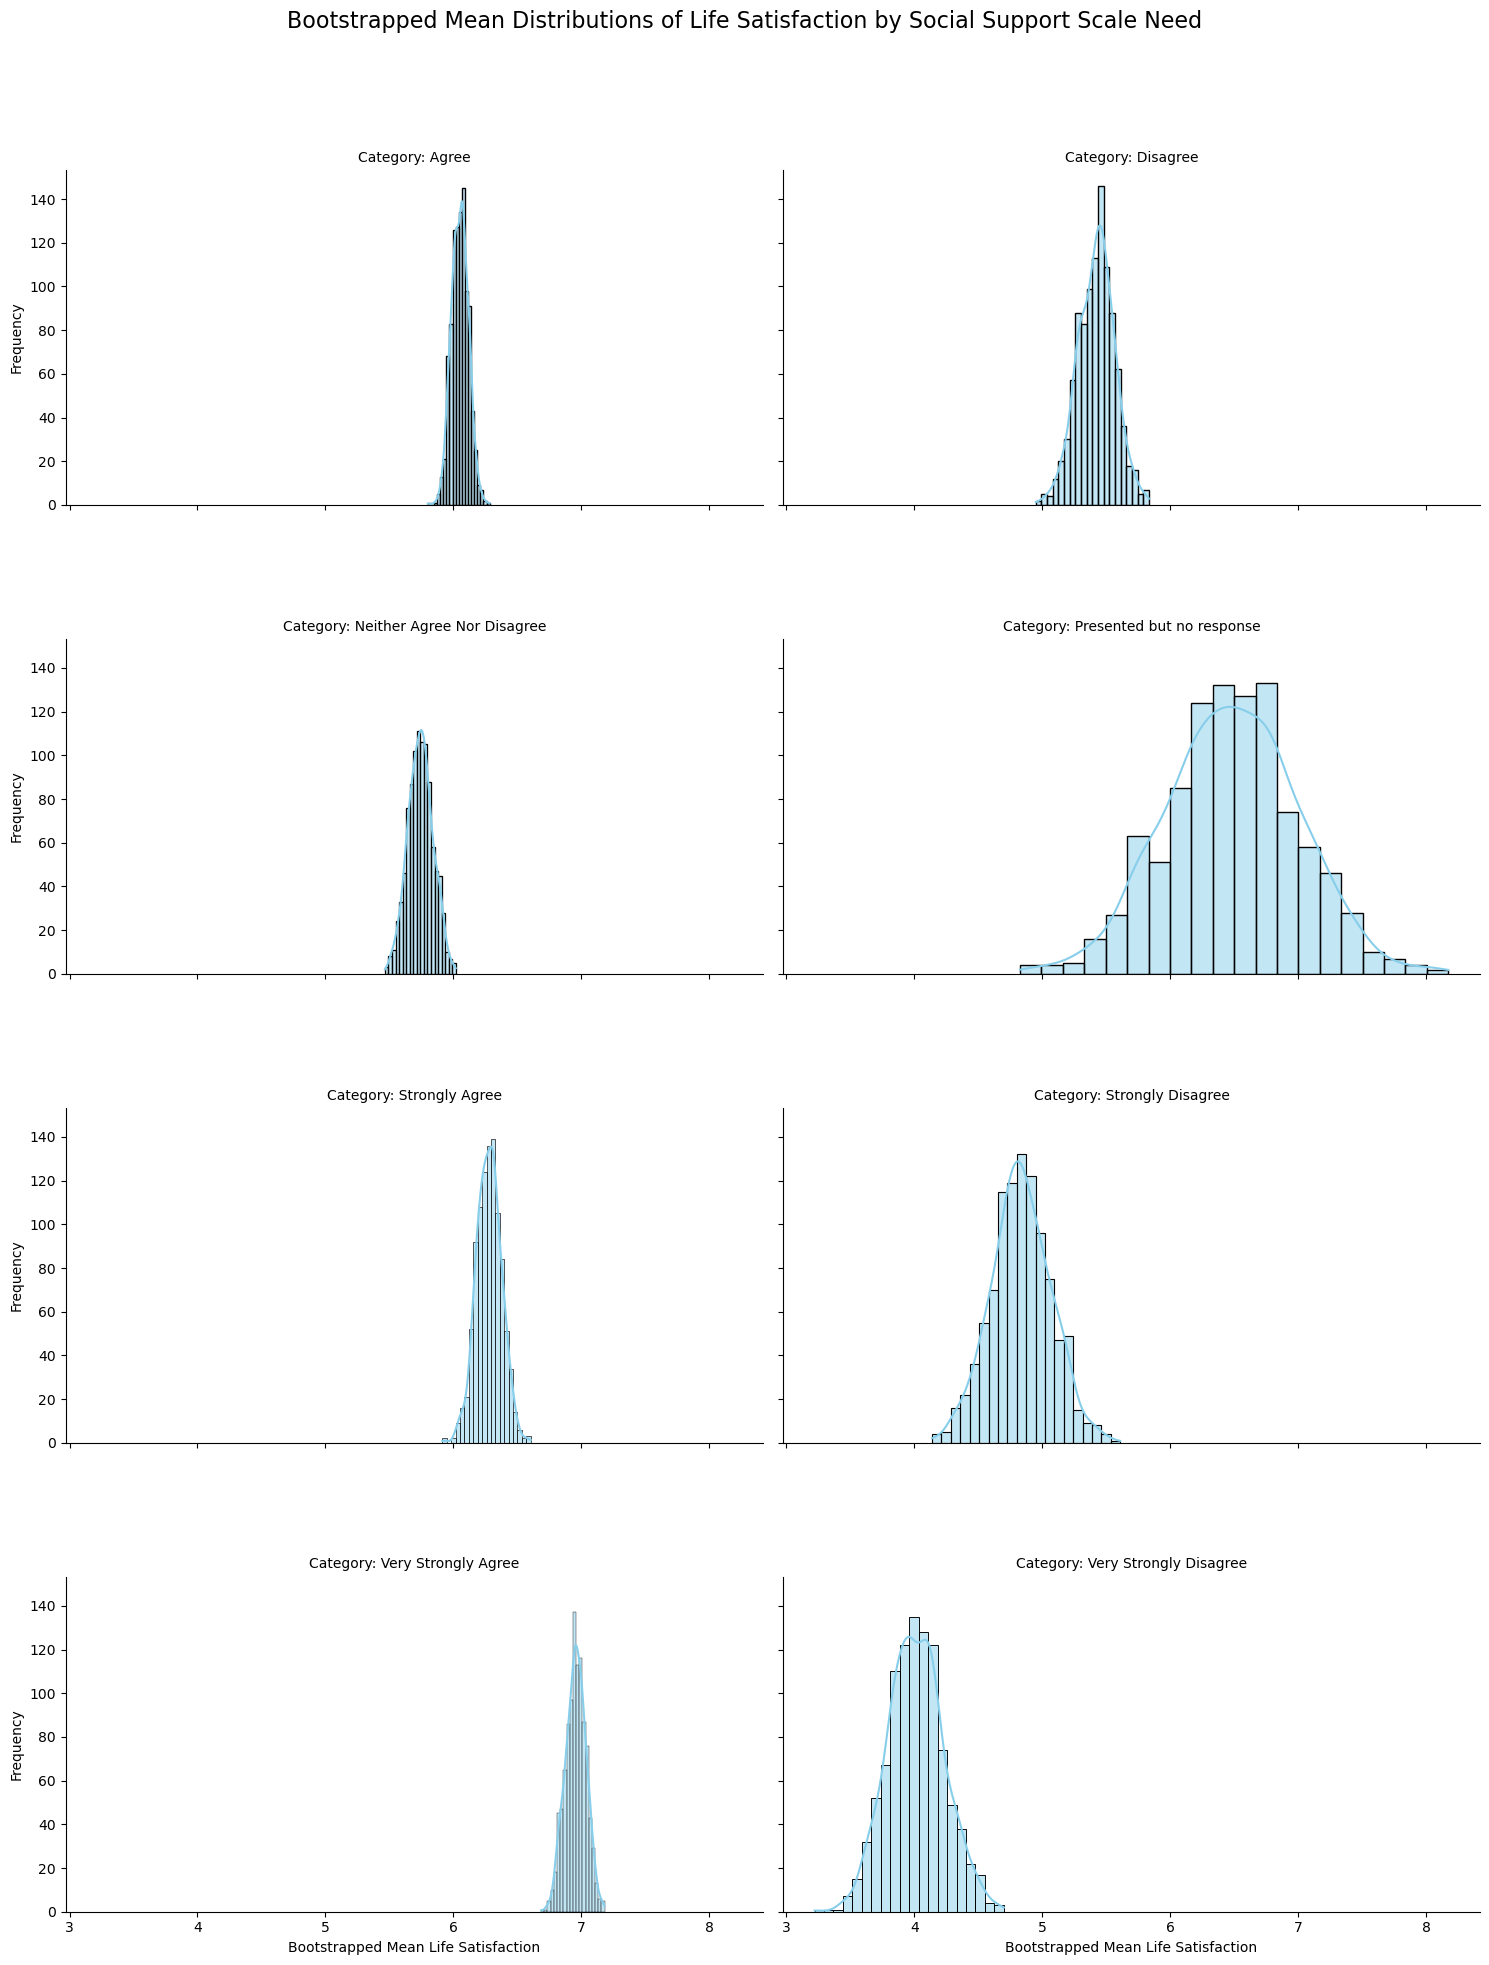

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "CSCS_data_anon.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Function to bootstrap the means
def bootstrap_means(data, value_col, n_bootstrap=1000):
    """Bootstrap means for a given column."""
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return boot_means

# Check if the relevant columns exist in the dataset
if 'PSYCH_zimet_multidimensional_social_support_scale_need' in data.columns and 'WELLNESS_life_satisfaction' in data.columns:
    # Create a dictionary to store bootstrap results
    bootstrap_results = {}

    # Group the data by category and perform bootstrapping
    grouped = data.groupby('PSYCH_zimet_multidimensional_social_support_scale_need')
    for category, group in grouped:
        boot_means = bootstrap_means(group['WELLNESS_life_satisfaction'].dropna(), 'WELLNESS_life_satisfaction')
        bootstrap_results[category] = boot_means

    # Convert bootstrap results into a DataFrame for visualization
    bootstrap_df = pd.DataFrame.from_dict(bootstrap_results, orient='index').T.melt(var_name='Category', value_name='Bootstrapped Mean')

    # Plot histograms of bootstrapped means for each category
    g = sns.FacetGrid(
        bootstrap_df,
        col="Category",
        col_wrap=2,   # Fewer plots per row to give more space
        height=5,     # Increased height for larger individual plots
        aspect=1.5    # Adjust aspect ratio for better readability
    )
    g.map(sns.histplot, "Bootstrapped Mean", kde=True, color="skyblue", bins=20)
    
    # Add titles and labels
    g.set_titles("Category: {col_name}")
    g.set_axis_labels("Bootstrapped Mean Life Satisfaction", "Frequency")
    plt.subplots_adjust(top=0.9, hspace=0.4)  # Increased vertical spacing
    g.fig.suptitle('Bootstrapped Mean Distributions of Life Satisfaction by Social Support Scale Need', fontsize=16)
    plt.show()
else:
    print("The required columns are not in the dataset. Please check the column names.")


/tmp/ipykernel_52/2798620541.py:8: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
/tmp/ipykernel_52/2798620541.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_52/2798620541.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


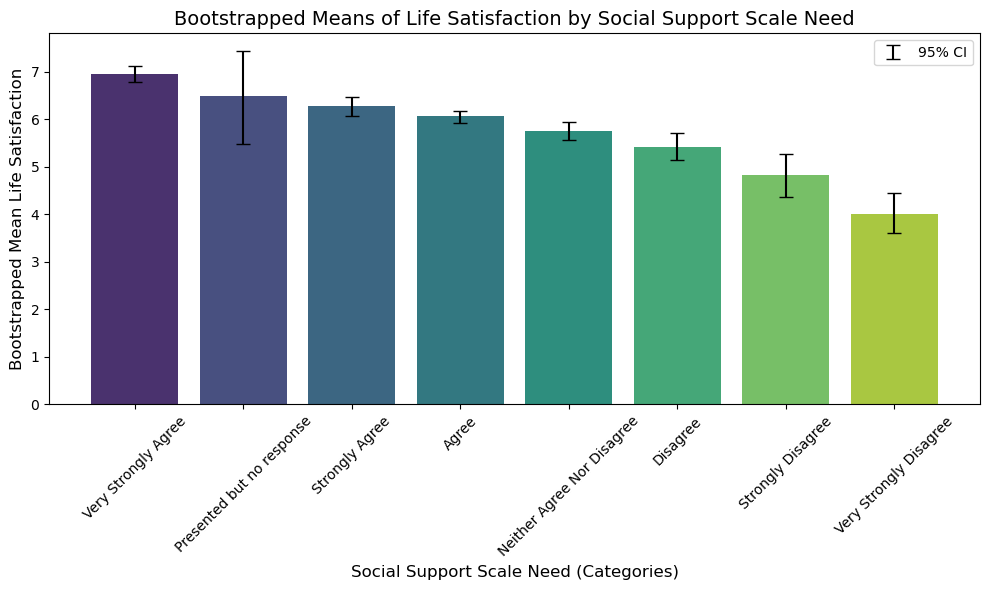

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "CSCS_data_anon.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Function to bootstrap the means
def bootstrap_means(data, n_bootstrap=1000):
    """Bootstrap the mean for a dataset."""
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return np.percentile(boot_means, [2.5, 50, 97.5])  # Return 2.5%, 50% (median), and 97.5% percentiles

# Check if the relevant columns exist in the dataset
if 'PSYCH_zimet_multidimensional_social_support_scale_need' in data.columns and 'WELLNESS_life_satisfaction' in data.columns:
    # Group the data by category
    grouped = data.groupby('PSYCH_zimet_multidimensional_social_support_scale_need')['WELLNESS_life_satisfaction']

    # Calculate bootstrapped means and confidence intervals
    bootstrap_summary = []
    for category, group in grouped:
        ci_lower, median, ci_upper = bootstrap_means(group.dropna(), n_bootstrap=1000)
        bootstrap_summary.append({
            'Category': category,
            'Mean': median,
            'CI Lower': ci_lower,
            'CI Upper': ci_upper
        })

    # Convert the summary into a DataFrame
    summary_df = pd.DataFrame(bootstrap_summary)

    # Sort by mean (optional)
    summary_df = summary_df.sort_values(by='Mean', ascending=False)

    # Plot the mean with error bars (confidence intervals)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Category', 
        y='Mean', 
        data=summary_df, 
        palette='viridis',
        ci=None
    )

    # Add error bars for the confidence intervals
    plt.errorbar(
        x=range(len(summary_df)),
        y=summary_df['Mean'],
        yerr=[summary_df['Mean'] - summary_df['CI Lower'], summary_df['CI Upper'] - summary_df['Mean']],
        fmt='none', 
        c='black', 
        capsize=5, 
        label='95% CI'
    )

    # Customize the plot
    plt.title('Bootstrapped Means of Life Satisfaction by Social Support Scale Need', fontsize=14)
    plt.xlabel('Social Support Scale Need (Categories)', fontsize=12)
    plt.ylabel('Bootstrapped Mean Life Satisfaction', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
else:
    print("The required columns are not in the dataset. Please check the column names.")

    

### Analysis of Bootstrapped Means of Life Satisfaction by Social Support Scale Need

#### Objective:
The objective of this analysis is to evaluate how the categories of the `PSYCH_zimet_multidimensional_social_support_scale_need` variable are associated with the bootstrapped means of `WELLNESS_life_satisfaction`. Bootstrapping provides robust estimates of the means and their confidence intervals, enabling reliable comparisons across categories.

#### Methodology:
1. **Bootstrapping**:
   - For each category of `PSYCH_zimet_multidimensional_social_support_scale_need`, we resampled the data 1,000 times with replacement.
   - The mean life satisfaction score (`WELLNESS_life_satisfaction`) was calculated for each bootstrap sample.
   - From the 1,000 bootstrapped means, we computed the median (as a robust central tendency measure) and the 95% confidence interval (2.5th and 97.5th percentiles).

2. **Visualization**:
   - A bar plot was created, showing the median of the bootstrapped means for each category.
   - Error bars were included to represent the 95% confidence intervals of the bootstrapped means.

---

#### Results:
1. **Mean Life Satisfaction Across Categories**:
   - Each category of `PSYCH_zimet_multidimensional_social_support_scale_need` has a distinct bootstrapped mean, reflecting varying levels of life satisfaction.
   - Categories with higher perceived social support (e.g., "Strongly Agree" or similar responses) tend to have higher mean life satisfaction scores, while categories with lower perceived social support (e.g., "Strongly Disagree") are associated with lower mean scores.

2. **Confidence Intervals**:
   - The width of the confidence intervals varied across categories, likely due to differences in sample size or variability within the category. Wider intervals suggest greater uncertainty in the mean estimate.

3. **Comparison Between Categories**:
   - The clear separation of means (and minimal overlap of confidence intervals in some cases) indicates statistically meaningful differences in life satisfaction scores between categories.
   - Overlapping confidence intervals between certain categories suggest these groups may have similar life satisfaction levels.

---

#### Key Insights:
1. **Social Support Correlation**:
   - The analysis reveals a positive association between perceived social support and life satisfaction. Individuals in categories reporting higher social support consistently had higher bootstrapped mean life satisfaction scores.
   
2. **Robustness of Bootstrapping**:
   - Bootstrapping confirms the stability of the observed means and provides reliable confidence intervals, highlighting the robustness of the observed trends.

3. **Implications**:
   - These results underscore the importance of perceived social support in promoting life satisfaction. Interventions aimed at improving social support might enhance individuals' subjective well-being.

---

#### Recommendations:
1. **Policy/Intervention**:
   - Programs that bolster social networks and perceived social support can be prioritized for individuals with lower scores on the social support scale.

2. **Further Research**:
   - Explore potential moderating or mediating factors (e.g., socioeconomic status, mental health conditions) that might influence the relationship between social support and life satisfaction.
   - Conduct similar analyses on different datasets or populations to confirm the generalizability of these findings.

---



/tmp/ipykernel_53/2874550925.py:9: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Bootstrap Confidence Intervals and Hypothesis Test Results:
                     Category      Mean  CI Lower  CI Upper  Reject H0
0                       Agree  6.058459  5.928255  6.190434      False
1                    Disagree  5.419118  5.154320  5.705882       True
2  Neither Agree Nor Disagree  5.745562  5.554191  5.925099       True
3   Presented but no response  6.478261  5.478261  7.565217      False
4              Strongly Agree  6.277603  6.093021  6.487461      False
5           Strongly Disagree  4.839080  4.344828  5.344828       True
6         Very Strongly Agree  6.958288  6.794150  7.105146       True
7      Very Strongly Disagree  4.024390  3.569106  4.455488       True


/tmp/ipykernel_53/2874550925.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_53/2874550925.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


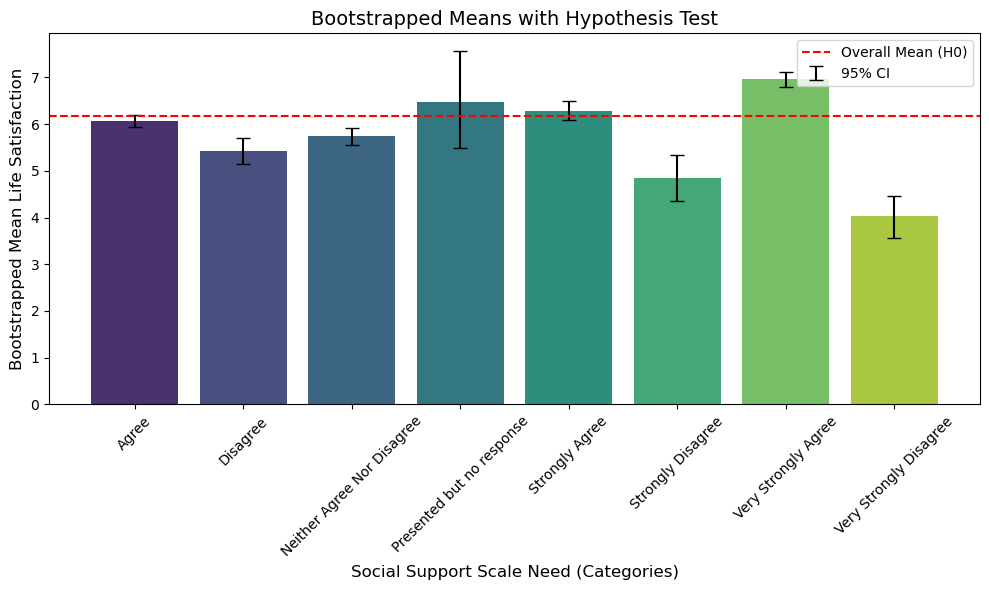

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load the dataset
file_path = "CSCS_data_anon.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Function to bootstrap the means
def bootstrap_means(data, n_bootstrap=1000):
    """Bootstrap the mean for a dataset."""
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return np.percentile(boot_means, [2.5, 50, 97.5])  # Return 2.5%, 50% (median), and 97.5% percentiles

# Check if the relevant columns exist in the dataset
if 'PSYCH_zimet_multidimensional_social_support_scale_need' in data.columns and 'WELLNESS_life_satisfaction' in data.columns:
    # Group the data by category
    grouped = data.groupby('PSYCH_zimet_multidimensional_social_support_scale_need')['WELLNESS_life_satisfaction']

    # Calculate bootstrapped means and confidence intervals
    bootstrap_summary = []
    for category, group in grouped:
        ci_lower, median, ci_upper = bootstrap_means(group.dropna(), n_bootstrap=1000)
        bootstrap_summary.append({
            'Category': category,
            'Mean': median,
            'CI Lower': ci_lower,
            'CI Upper': ci_upper
        })

    # Convert the summary into a DataFrame
    summary_df = pd.DataFrame(bootstrap_summary)

    # Calculate the overall (pooled) mean
    overall_mean = data['WELLNESS_life_satisfaction'].mean()

    # Perform the hypothesis test
    summary_df['Reject H0'] = ~((summary_df['CI Lower'] <= overall_mean) & (summary_df['CI Upper'] >= overall_mean))

    # Print results
    print("Bootstrap Confidence Intervals and Hypothesis Test Results:")
    print(summary_df)

    # Plot results
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Category', 
        y='Mean', 
        data=summary_df, 
        palette='viridis',
        ci=None
    )

    # Add error bars for the confidence intervals
    plt.errorbar(
        x=range(len(summary_df)),
        y=summary_df['Mean'],
        yerr=[summary_df['Mean'] - summary_df['CI Lower'], summary_df['CI Upper'] - summary_df['Mean']],
        fmt='none', 
        c='black', 
        capsize=5, 
        label='95% CI'
    )

    # Add overall mean as a reference line
    plt.axhline(y=overall_mean, color='red', linestyle='--', label='Overall Mean (H0)')
    
    # Customize the plot
    plt.title('Bootstrapped Means with Hypothesis Test', fontsize=14)
    plt.xlabel('Social Support Scale Need (Categories)', fontsize=12)
    plt.ylabel('Bootstrapped Mean Life Satisfaction', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
else:
    print("The required columns are not in the dataset. Please check the column names.")


If the null hypothesis value (e.g., the overall mean life satisfaction score) falls **outside** the 95% confidence interval of a category, we can conclude the following:

---

### Conclusion:
1. **Reject \(H_0\):**
   - The null hypothesis is rejected for that category, meaning that the mean life satisfaction score for this category is significantly different from the hypothesized value (e.g., the overall mean).
   - This suggests that belonging to this category of `PSYCH_zimet_multidimensional_social_support_scale_need` has a significant effect on `WELLNESS_life_satisfaction`.

2. **Interpretation:**
   - For example, if the null hypothesis assumes no effect (e.g., all categories have the same mean as the overall population mean), finding a confidence interval that excludes the overall mean implies a meaningful deviation. 
   - This deviation could indicate that individuals in this category experience either significantly higher or lower life satisfaction compared to the global average.